<a href="https://colab.research.google.com/github/kcopp-crypto/Python/blob/main/K_Copp_DATA_342_Fall_2025_Lab_3_Predictive_Modeling_Adjusted_Closing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Using Descriptive Statistics (Lab 1) and Hypothesis Testing (Lab 2) to Evaluate Daily Returns of Nvidia and AMD as a Basis for Developing a Predictive Model (Lab 3)**

# Lab 1

**Step 1**: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step 2**: Install Required Libraries

Note: This has been updated

In [ ]:
!pip install openpyxl matplotlib pandas scikit-learn statsmodels

**Step 3**: Import Libraries

Note: This has been updated.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

**Step 4**: Load the Data

In [ ]:
#Load Data
import requests
import pandas as pd

file_id = '10UHOG_LRvrZj_gTzOGZa37Mrgxkd2SY7'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('Lab 1 - NVIDIA - AMD.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('Lab 1 - NVIDIA - AMD.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

**Step 5**: Display Sample Rows

In [ ]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
0 2024-01-02   NVDA      48.14           NaN
1 2024-01-03   NVDA      47.55     -0.012256
2 2024-01-04   NVDA      47.97      0.008833
3 2024-01-05   NVDA      49.07      0.022931
4 2024-01-08   NVDA      52.23      0.064398


**Step 6**: Clean and Format the Data


In [ ]:
df.columns = [col.strip().replace('\xa0', '') for col in df.columns] # Ensure all column names are cleaned
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # Remove rows with missing returns

# Verify that no NaN values remain in 'Daily Return'
print(f"NaN values in 'Daily Return' after cleaning: {df['Daily Return'].isnull().sum()}")

NaN values in 'Daily Return' after cleaning: 0


**Step 7**: Separate Nvidia and AMD Data

In [ ]:
NVDA_df = df[df['Ticker'] == 'NVDA'].copy()
AMD_df = df[df['Ticker'] == 'AMD'].copy()

**Step 8**: Display Sample Rows

In [ ]:
print("\nNVIDIA Daily Returns:")
print(NVDA_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nAMD Daily Returns:")
print(AMD_df[['Date', 'Adj Close', 'Daily Return']].head())


NVIDIA Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      47.55     -0.012256
2 2024-01-04      47.97      0.008833
3 2024-01-05      49.07      0.022931
4 2024-01-08      52.23      0.064398
5 2024-01-09      53.11      0.016849

AMD Daily Returns:
          Date  Adj Close  Daily Return
252 2024-01-03     135.32     -0.023524
253 2024-01-04     136.01      0.005099
254 2024-01-05     138.58      0.018896
255 2024-01-08     146.18      0.054842
256 2024-01-09     149.26      0.021070


**Step 9**: Visualize Daily Returns with Box and Whisker Plots

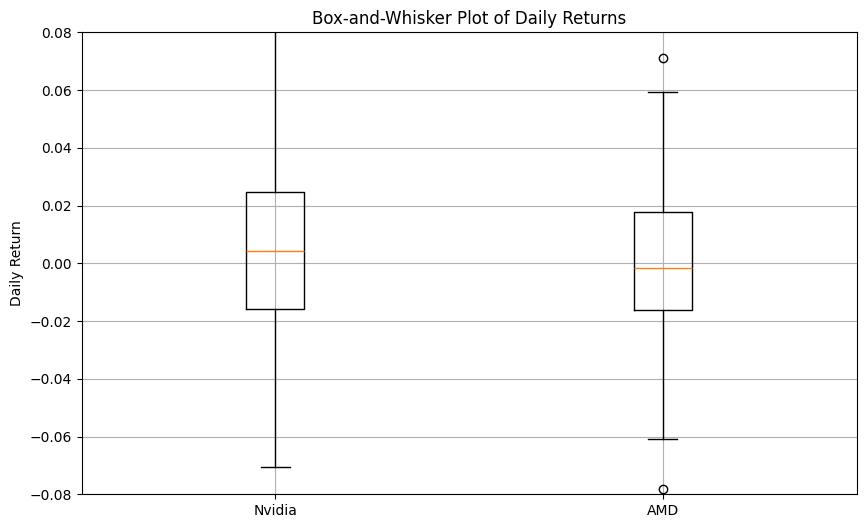

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([NVDA_df['Daily Return'], AMD_df['Daily Return']], tick_labels=['Nvidia', 'AMD'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.ylim(-0.08, 0.08) # Set the y-axis limits
plt.show()

#**Lab 2**

**Step 10**: Descriptive Statistics

Note: Code has been improved for accuracy. This update may also influence the output for the hypothesis test.

In [ ]:
from scipy import stats

def descriptive_stats(series):
    stats_dict = {
        'Mean': series.mean(),
        'Standard Error': series.sem(), # Added Standard Error
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else '#N/A', # Handle #N/A for empty mode
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max(),
        'Sum': series.sum(), # Added Sum
        'Count': series.count() # Added Count
    }
    return stats_dict

# Compute descriptive statistics
NVDA_stats = descriptive_stats(NVDA_df['Daily Return'])
AMD_stats = descriptive_stats(AMD_df['Daily Return'])

# Print the results for Nvidia (keeping existing format)
print("Descriptive Statistics for Nvidia (NVDA):")
for key, value in NVDA_stats.items():
    # Check if value is a float before formatting
    if isinstance(value, (float, np.float64)):
        print(f"{key}: {value:.9f}") # Increased precision for floats
    else:
        print(f"{key}: {value}")

# Print the results for AMD (custom format as requested)
print("\nDescriptive Statistics for AMD (AMD):")
AMD_output_order = [
    'Mean',
    'Standard Error',
    'Median',
    'Mode',
    'Standard Deviation',
    'Sample Variance',
    'Kurtosis',
    'Skewness',
    'Range',
    'Minimum',
    'Maximum',
    'Sum',
    'Count'
]

for key in AMD_output_order:
    value = AMD_stats.get(key)
    if isinstance(value, (float, np.float64)):
        print(f"{key}: {value:.9f}") # Increased precision for floats
    else:
        print(f"{key}: {value}")


Descriptive Statistics for Nvidia (NVDA):
Mean: 0.004745600
Standard Error: 0.002093239
Median: 0.004089030
Mode: -0.099964552
Standard Deviation: 0.033097016
Sample Variance: 0.001095412
Kurtosis: 2.661836684
Skewness: 0.377118606
Range: 0.263962179
Minimum: -0.099964552
Maximum: 0.163997628
Sum: 1.186399919
Count: 250

Descriptive Statistics for AMD (AMD):
Mean: -0.000043594
Standard Error: 0.001899437
Median: -0.001576457
Mode: -0.106165414
Standard Deviation: 0.030032740
Sample Variance: 0.000901965
Kurtosis: 1.729220984
Skewness: -0.172138166
Range: 0.213110450
Minimum: -0.106165414
Maximum: 0.106945036
Sum: -0.010898401
Count: 250


**Step 11**: Hypothesis Testing

In [ ]:
# Hypothesis Testing: Independent t-test
t_stat, p_value = stats.ttest_ind(NVDA_df['Daily Return'], AMD_df['Daily Return'], equal_var=False)
print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis Testing (Independent t-test):
T-statistic: 1.6943465530919377
P-value: 0.09083052513517866


**Step 12**: Bar Graph with Error Bars

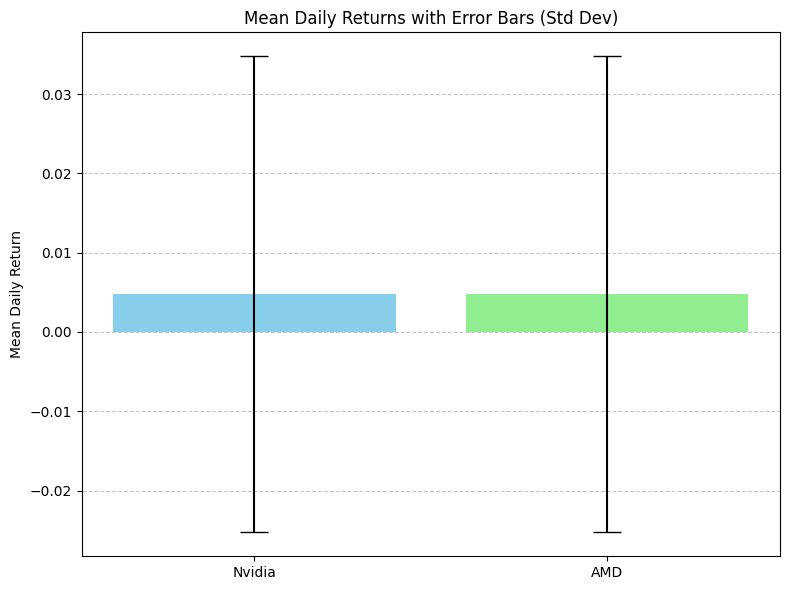

In [ ]:
# Install required libraries (if not already installed)
!pip install pandas matplotlib openpyxl scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file from Google Drive or URL
file_path = '/content/Lab 1 - NVIDIA - AMD.xlsx'  # Update path if needed
df = pd.read_excel(file_path, sheet_name='Daily Returns 2024', engine='openpyxl')

# Clean and filter the data
df.columns = [col.strip().replace('\xa0', '') for col in df.columns] # Ensure all column names are cleaned
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

# Separate Walmart and Costco data
NVDA_df = df[df['Ticker'] == 'NVDA'].copy()
AMD_df = df[df['Ticker'] == 'AMD'].copy()

# Compute mean and standard deviation for error bars
mean_NVDA = NVDA_df['Daily Return'].mean()
std_NVDA = NVDA_df['Daily Return'].std()
mean_AMD = AMD_df['Daily Return'].mean()
std_AMD = AMD_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(NVDA_df['Daily Return'], AMD_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_NVDA, mean_NVDA]
errors = [std_AMD, std_AMD]
labels = ['Nvidia', 'AMD']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns with Error Bars (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation**:

The p-value > 0.05, so we fail to reject the null hypothesis.

This means there is no statistically significant difference in the average daily returns between Walmart and Costco based on this dataset.

# Lab 3

**Introduction to Lab 3**

This notebook will guide you through:
- Performing regression analysis for Nvidia and AMD
- Visualizing predictions vs actual values
- Evaluating model performance using RMSE


**Step 13**: Filter Q1 Data

In [ ]:
# Filter Q1 2024 data
q1_2024_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-03-31')].copy()
q1_2024_df = q1_2024_df.sort_values('Date')
q1_2024_df['DayIndex'] = np.arange(len(q1_2024_df))

# Separate Nvidia and AMD data
NVDA_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'NVDA'].copy()
AMD_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'AMD'].copy()

**Step 14**: Develop a Regression Model for Q1 2024 Data

Read the [Simple Linear Regression: Everything You Need to Know](https://www.datacamp.com/tutorial/simple-linear-regression)

Read the [RMSE Explained: A Guide to Regression Prediction Accuracy](https://www.datacamp.com/tutorial/rmse)

Review example interpretation of a regression analysis included in the Business Analytics textbook page 114

Review additional instructional video provided in MH Connect, "[Video on Regression Analysis](https://connect.mheducation.com/connect/eztassignment/previewAssignment.htm?assignmentId=418523760&moduleId=7843495718)", where you can also find the Business Analytics textbook. **Note**: Sign-in required to access video in MH Connect.


===== Nvidia Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:         Q("Adj Close")   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1701.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.12e-44
Time:                        17:21:58   Log-Likelihood:                -141.26
No. Observations:                  60   AIC:                             286.5
Df Residuals:                      58   BIC:                             290.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    

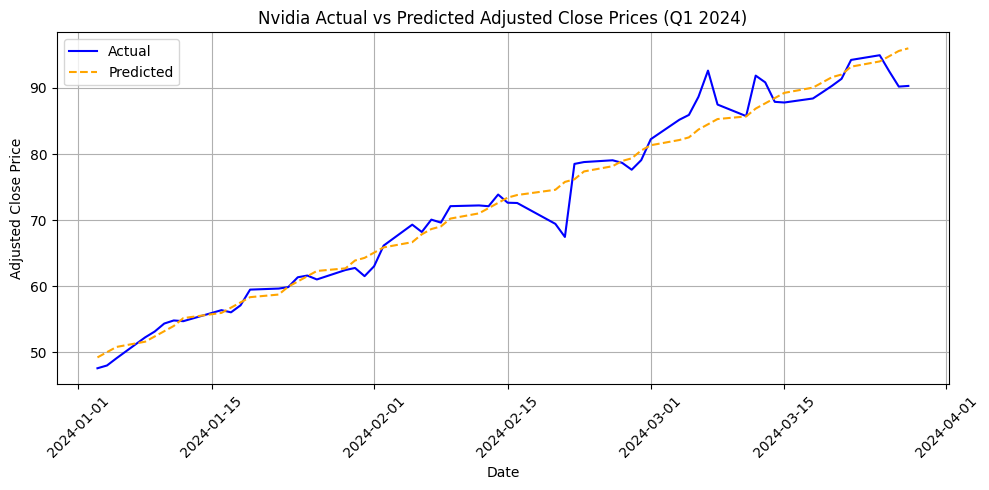

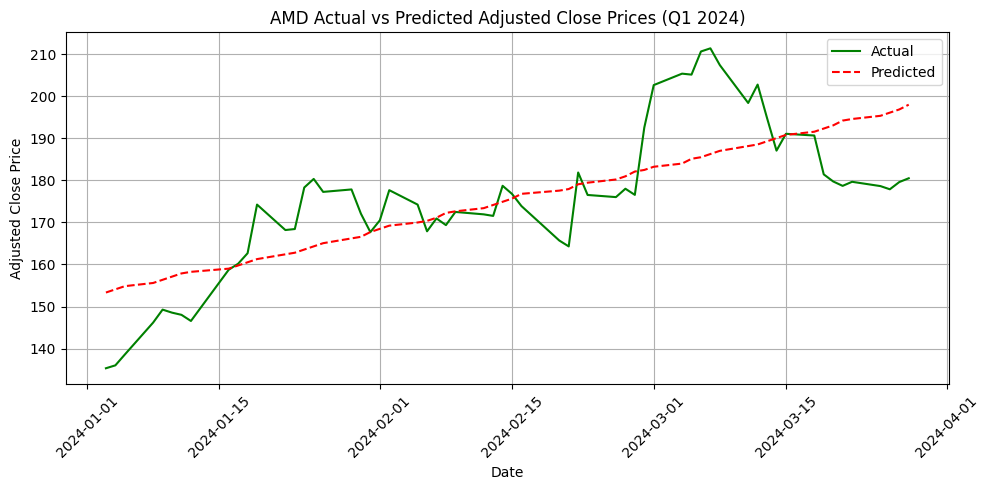

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Regression function with additional metrics
def perform_regression(data, company_name):
    # Using statsmodels for more robust statistical metrics
    # Note: statsmodels OLS requires a constant term for the intercept, which it adds by default
    # We need to ensure the column names are valid for formula API, hence Q("Adj Close")
    model_sm = smf.ols(formula='Q("Adj Close") ~ DayIndex', data=data).fit()

    print(f"\n===== {company_name} Regression Summary =====")
    print(model_sm.summary())  # Includes R², Adjusted R², F-statistic, p-values, confidence intervals

    # ANOVA table
    anova_table = sm.stats.anova_lm(model_sm, typ=2)
    print("\nANOVA Table:")
    print(anova_table)

    # Metrics from statsmodels summary
    r_square = model_sm.rsquared
    adjusted_r_square = model_sm.rsquared_adj
    multiple_r = np.sqrt(r_square) # Typically sqrt(R-squared) for simple linear regression

    # Standard Error of the regression (Residual Standard Error)
    # This is np.sqrt(model_sm.mse_resid)
    standard_error = np.sqrt(model_sm.mse_resid)

    # Use sklearn for predictions and RMSE calculation for consistency
    X = data[['DayIndex']]
    y = data['Adj Close']
    model_sk = LinearRegression()
    model_sk.fit(X, y)
    y_pred = model_sk.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Add predictions to data
    data['Predicted'] = y_pred

    metrics = {
        'Multiple R': multiple_r,
        'R Square': r_square,
        'Adjusted R Square': adjusted_r_square,
        'Standard Error': standard_error,
        'RMSE': rmse
    }

    return model_sk, data, metrics # Return sklearn model for consistent prediction method

# Run regression for both companies
NVDA_model, NVDA_2024_with_predictions, NVDA_metrics = perform_regression(NVDA_2024, 'Nvidia')
AMD_model, AMD_2024_with_predictions, AMD_metrics = perform_regression(AMD_2024, 'AMD')

# Print metrics
print("Nvidia Regression Metrics:")
for key, value in NVDA_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

print("\nAMD Regression Metrics:")
for key, value in AMD_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

# Plot Nvidia actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(NVDA_2024_with_predictions['Date'], NVDA_2024_with_predictions['Adj Close'], label='Actual', color='blue')
plt.plot(NVDA_2024_with_predictions['Date'], NVDA_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='orange')
plt.title('Nvidia Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMD actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(AMD_2024_with_predictions['Date'], AMD_2024_with_predictions['Adj Close'], label='Actual', color='green')
plt.plot(AMD_2024_with_predictions['Date'], AMD_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='red')
plt.title('AMD Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Example Interpretation of Walmart's Regression**

1. **Regression Statistics**


Multiple R = 0.9763

This is the correlation between the actual and predicted values. A value close to 1 means a very strong positive linear relationship.


R Square = 0.9531 (95.31%)

This means 95.31% of the variation in Walmart’s adjusted close price is explained by the model (DayIndex). The model fits the data very well.


Adjusted R Square = 0.9523

Similar to R² but adjusted for the number of predictors. Since we only have one predictor, it’s almost the same as R².


Standard Error = 0.6406

This is the standard deviation of the residuals (errors). On average, predictions differ from actual values by about $0.64.

Observations = 61
There are 61 data points in Q1 2024.


2. **ANOVA Table**

F-statistic = 1199.04, Significance F = 6.67E-41

The F-test checks if the model explains a significant amount of variance compared to a model with no predictors.

The extremely small p-value (close to zero) means the model is highly significant.

3. **Coefficients Table**

Intercept = 51.1543

When DayIndex = 0 (start of Q1), the predicted price is about $51.15.


X Variable 1 (DayIndex) = 0.1613

For each additional day, the adjusted close price increases by about $0.16.


**t-stat and p-value**

Intercept: t = 308, p ≈ 0 → highly significant

DayIndex: t = 34.63, p ≈ 0 → highly significant

Both coefficients are statistically significant.


**Confidence Interval (95%)**

Intercept: [50.82, 51.49]

DayIndex: [0.152, 0.171]

This means we are 95% confident the true slope is between 0.152 and 0.171.

4. **RMSE**

Source: RMSE Explained: A Guide to Regression Prediction Accuracy. https://www.datacamp.com/tutorial/rmse

RMSE is interpreted as the average prediction error, which determines the model’s prediction accuracy. Put simply, it shows, on average, how far the predictions are from the actual values, in the same scale as the outcome variable.

A lower RMSE suggests smaller average prediction errors and, hence, more accurate predictions, but the “acceptable” RMSE depends entirely on the context. For example, an RMSE of 2 might be good when predicting almond size in millimeters, but not so compelling when predicting annual almond crop yields in tons. For instance, Walmart's low RMSE is indicative of higher accuracy in predicting the Adjusted Close Price.


**Interpretation**

The regression model shows a very strong linear trend: Walmart’s stock price increased steadily during Q1 2024, about 16 cents per day. The model explains 95% of the variation, and the relationship is statistically significant. Predictions are very close to actual prices with an error of about $0.64.

**BONUS** (optional)

**Step 15**: Forecast Q1 2025 data

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecasts exported successfully to Q1_2025_Forecasts.xlsx


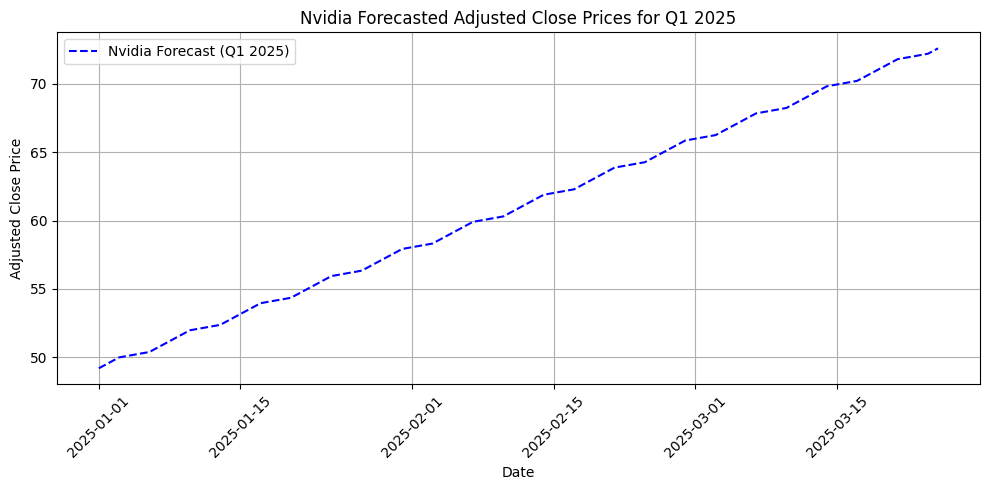

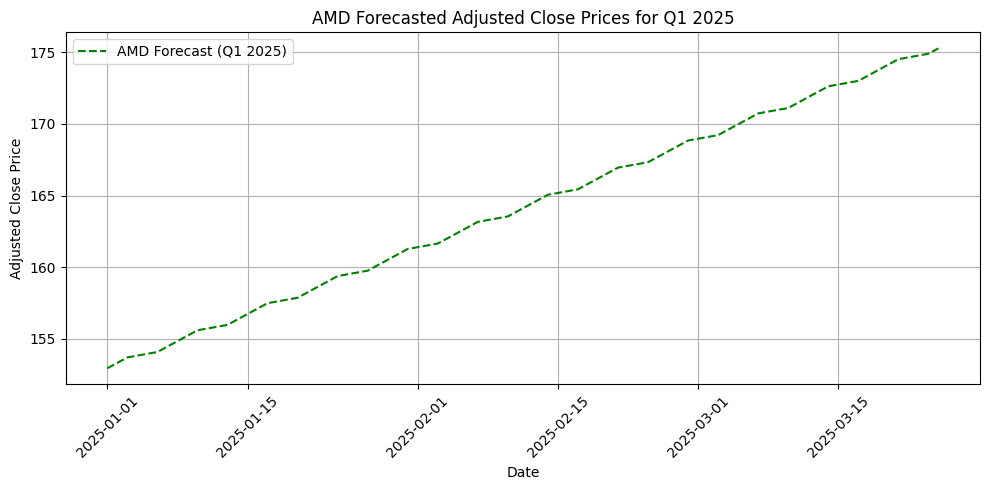

In [ ]:
# ARIMA Forecast Q1 2025
forecast_days = len(NVDA_2024_with_predictions)
forecast_dates = pd.date_range(start='2025-01-01', periods=forecast_days, freq='B')
NVDA_forecast = NVDA_model.predict(np.arange(forecast_days).reshape(-1, 1))
AMD_forecast = AMD_model.predict(np.arange(forecast_days).reshape(-1, 1))

# Create forecast dataframes
NVDA_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': NVDA_forecast})
AMD_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': AMD_forecast})

# Export to Excel with two sheets
output_file = 'Q1_2025_Forecasts.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    NVDA_forecast_df.to_excel(writer, sheet_name='Nvidia Forecast', index=False)
    AMD_forecast_df.to_excel(writer, sheet_name='AMD Forecast', index=False)

print(f"Forecasts exported successfully to {output_file}")

# Plot Nvidia forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, NVDA_forecast, label='Nvidia Forecast (Q1 2025)', linestyle='--', color='blue')
plt.title('Nvidia Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMD forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, AMD_forecast, label='AMD Forecast (Q1 2025)', linestyle='--', color='green')
plt.title('AMD Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: Your Excel output file, Q1_2025_Forecasts.xlsx, has been saved directly to your Colab environment. You can find it in the file browser to the left of your notebook, typically in the /content/ directory. You can download it from there to your local machine.

See screen shot image below:

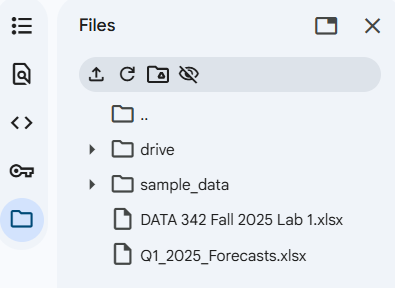